<a href="https://colab.research.google.com/github/linh-ne/case-study/blob/main/Case_study_CarPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import thư viện
import pandas as pd

In [2]:
# Đọc file dữ liệu
data = pd.read_csv('Case_study_CarPrice_Assignment.csv')

In [4]:
# Trích xuất hãng xe từ cột carName
data['CarBrand'] = data['CarName'].apply(lambda x: x.split(' ')[0])

In [5]:
# Hiển thị các hãng xe duy nhất
print(data['CarBrand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [ ]:
# Kiểm tra xem có bất kỳ lỗi nào trong dữ liệu hãng xe (ví dụ: tên hãng xe bị viết sai chính tả)
# Các lỗi phổ biến: tên hãng xe viết sai, không thống nhất
# Dùng hàm replace để sửa

In [6]:
# Sửa bằng hàm replace
data['CarBrand'] = data['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'toyouta': 'toyota'
})

# Hiển thị lại sau khi đã sửa lỗi
print(data['CarBrand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [7]:
data.to_csv('Cleaned_CarPrice_Assignment.csv', index=False)

In [8]:
# Kiểm tra kiểu dữ liệu hiện tại của các thuộc tính
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# Chuyển đổi cột symboling về kiểu int (nếu chưa đúng)
data['symboling'] = data['symboling'].astype(int)

# Chuyển đổi cột price về kiểu float (nếu chưa đúng)
data['price'] = data['price'].astype(float)

# Chuyển đổi các cột phân loại về kiểu category
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']
for var in categorical_vars:
    data[var] = data[var].astype('category')

# Hiển thị lại thông tin sau khi chuyển đổi
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [10]:
print(data.head())
print(data.describe(include='all'))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

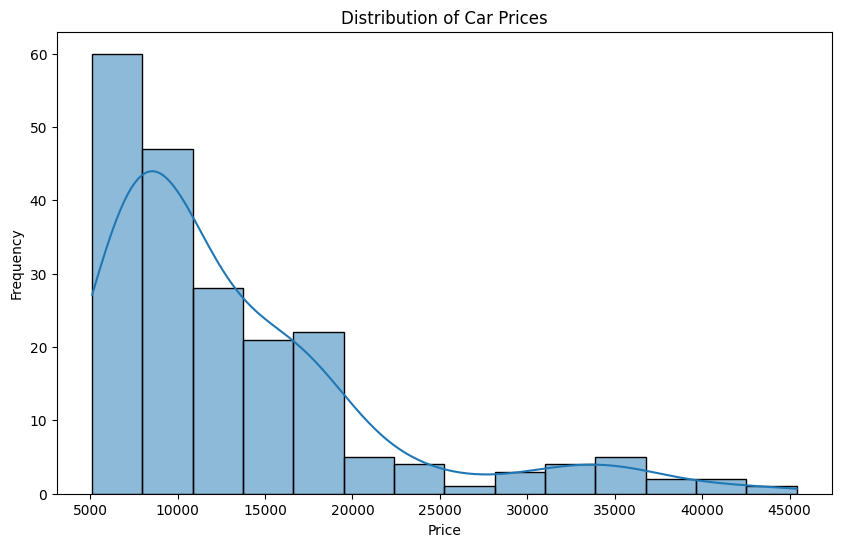

In [12]:
# Biểu đồ phân phối giá
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Phân tích mối liên hệ giữa các thuộc tính phân loại và giá (price)

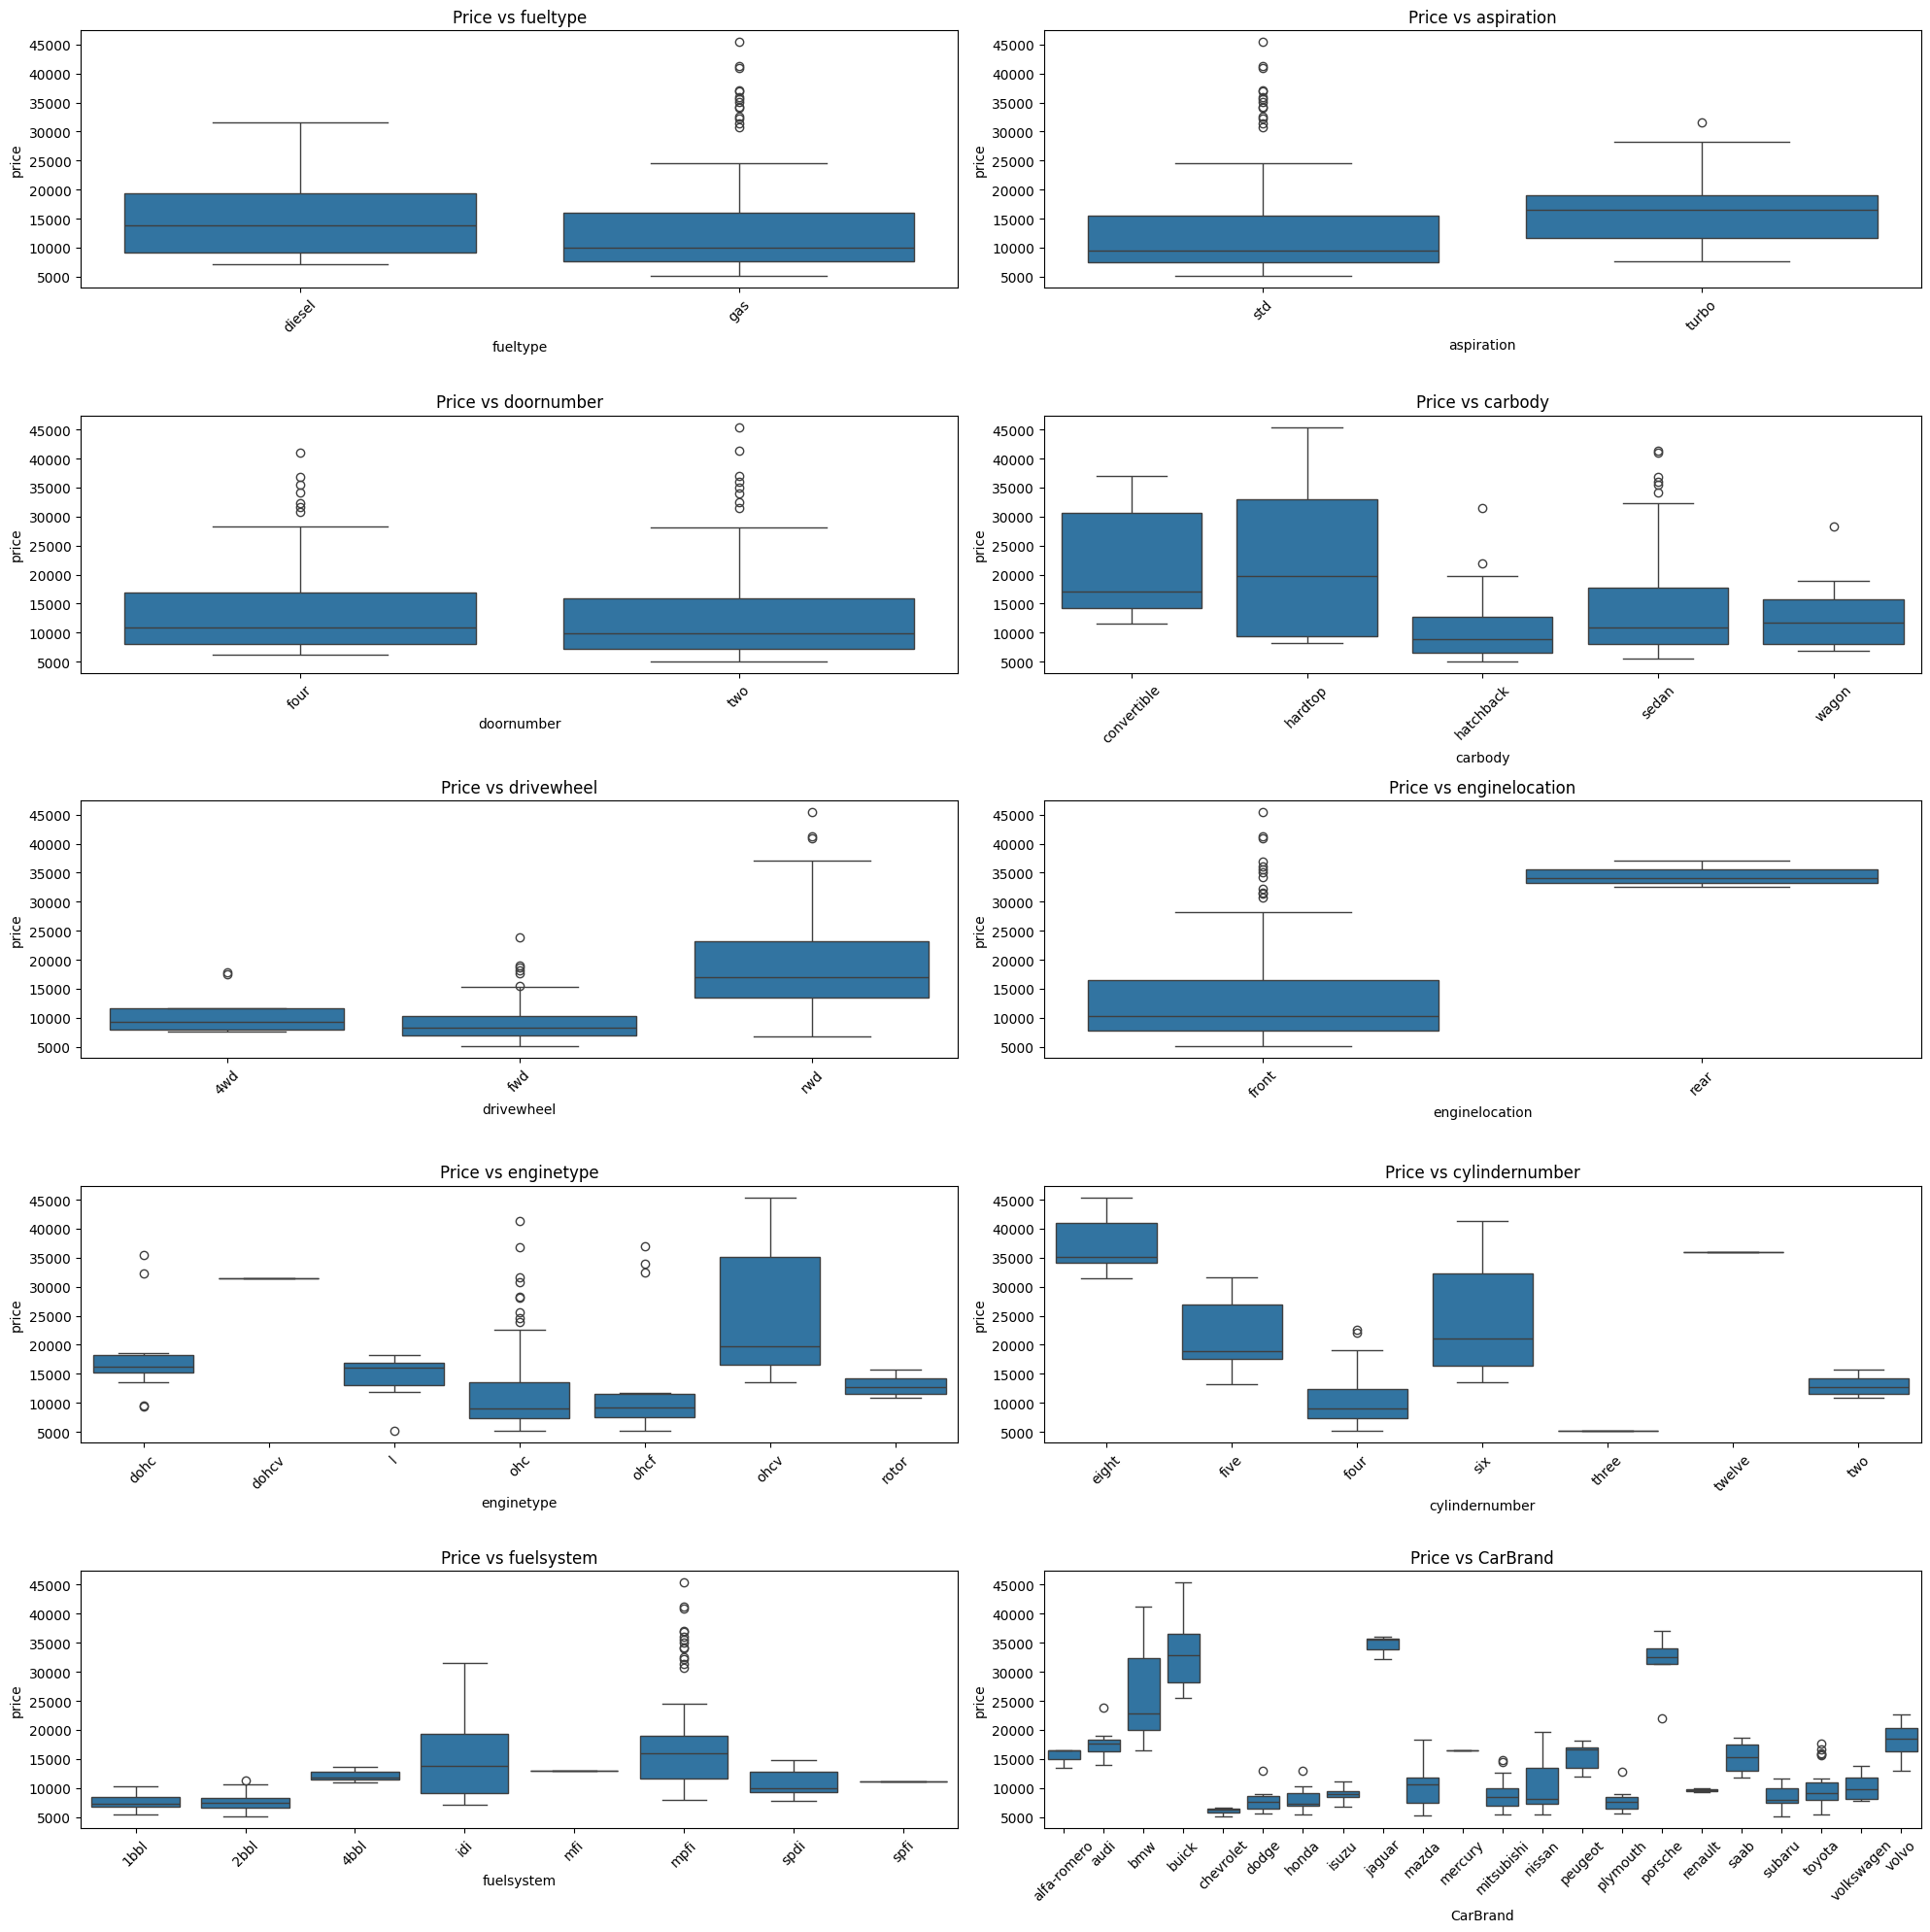

In [13]:
# Biểu đồ boxplot cho các thuộc tính phân loại
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']

plt.figure(figsize=(20, 20))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=var, y='price', data=data)
    plt.title(f'Price vs {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#  Phân tích mối liên hệ giữa các thuộc tính số học và giá (price)

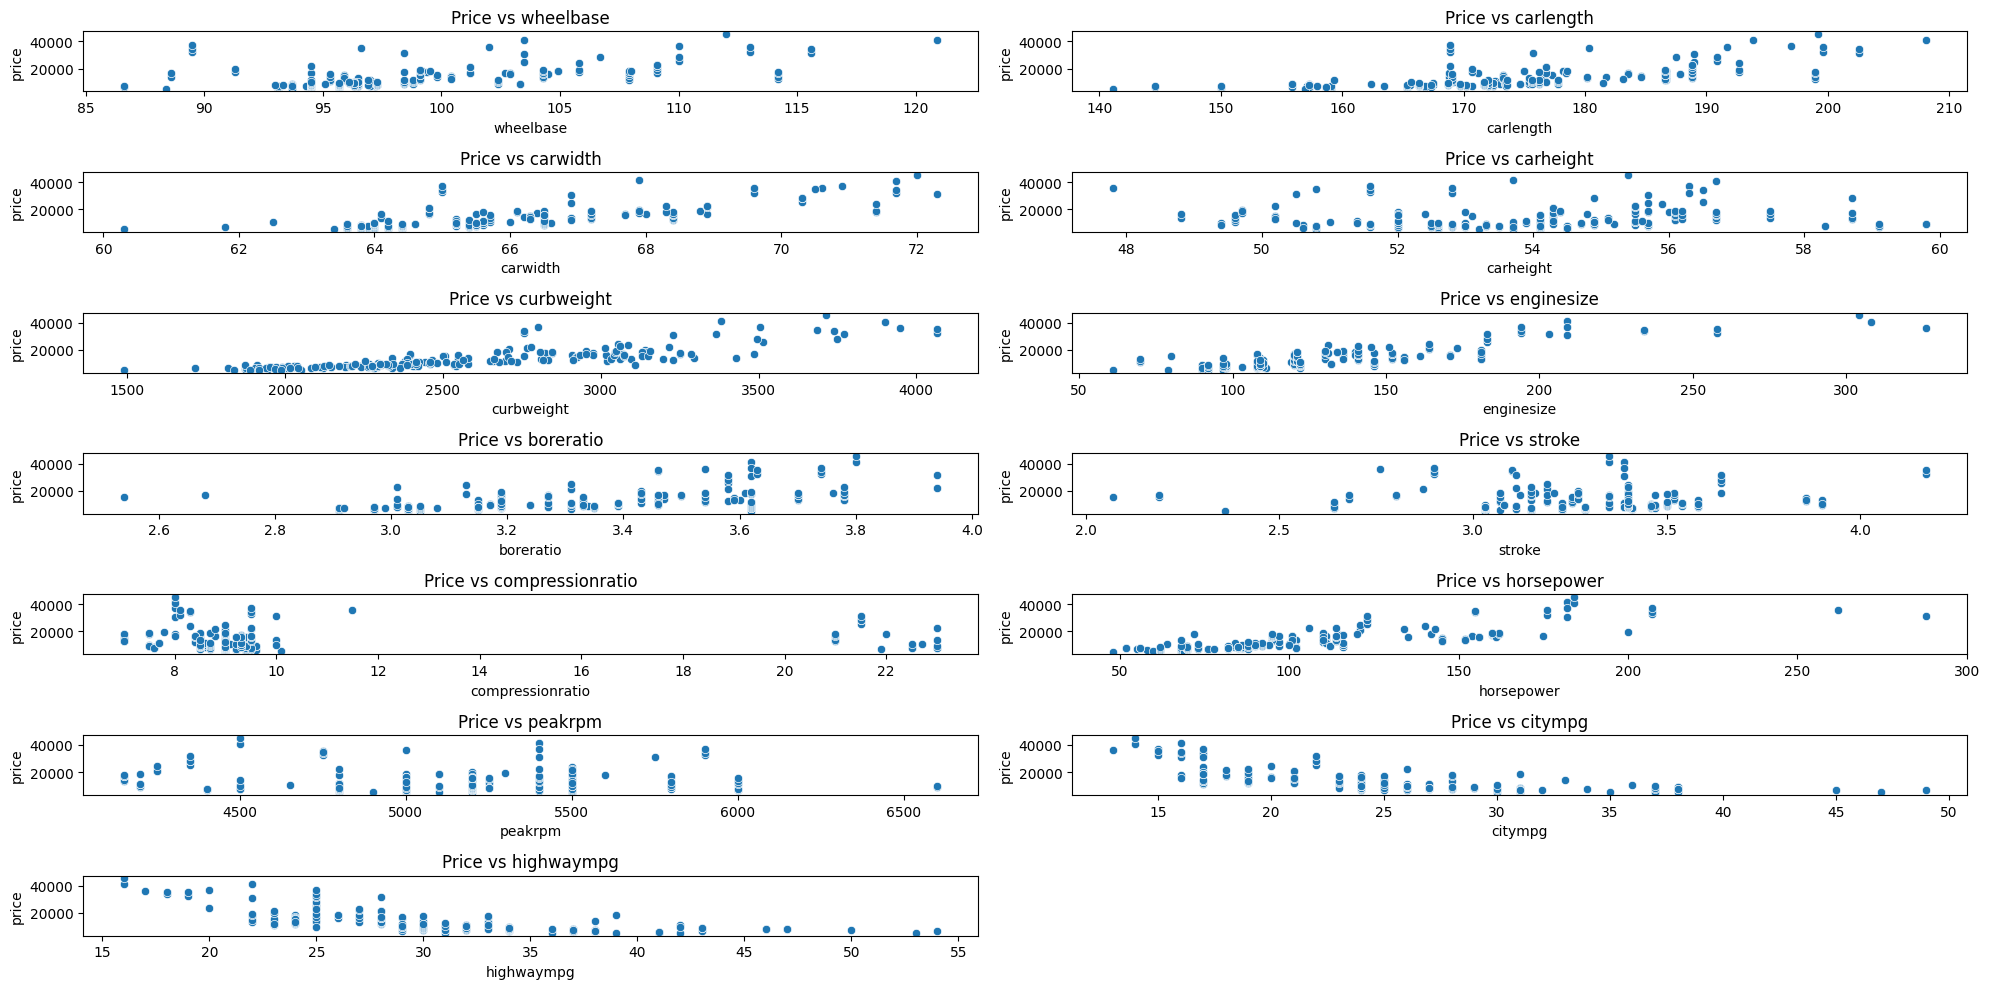

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [32]:
# Biểu đồ scatter plot và hệ số tương quan
numerical_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

plt.figure(figsize=(20, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(7, 2, i+1)
    sns.scatterplot(x=var, y='price', data=data)
    plt.title(f'Price vs {var}')
plt.tight_layout()
plt.show()

# Chỉ chọn các cột số trước khi tính tương quan
numerical_data = data.select_dtypes(include=['float', 'int'])

# Tính toán hệ số tương quan
correlation_matrix = numerical_data.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

In [ ]:
# Phép kiểm định thống kê

In [16]:
import scipy.stats as stats

In [17]:
# ANOVA cho các thuộc tính phân loại
anova_results = {}
for var in categorical_vars:
    categories = data[var].unique()
    category_groups = [data['price'][data[var] == cat] for cat in categories]
    anova_results[var] = stats.f_oneway(*category_groups)
    print(f'ANOVA for {var}: F-statistic={anova_results[var].statistic}, p-value={anova_results[var].pvalue}')

ANOVA for fueltype: F-statistic=2.2927407366575174, p-value=0.13153563336537924
ANOVA for aspiration: F-statistic=6.636621968649918, p-value=0.010700300833183433
ANOVA for doornumber: F-statistic=0.20594600575940436, p-value=0.6504483953298938
ANOVA for carbody: F-statistic=8.031976496876302, p-value=5.031712258477608e-06
ANOVA for drivewheel: F-statistic=70.3205526496926, p-value=6.632887281209634e-24
ANOVA for enginelocation: F-statistic=23.9697400547047, p-value=1.993019639057392e-06
ANOVA for enginetype: F-statistic=9.376220306463633, p-value=4.692664568743044e-09
ANOVA for cylindernumber: F-statistic=57.568880995353695, p-value=8.065780498463557e-41
ANOVA for fuelsystem: F-statistic=15.641864574663314, p-value=2.990385908932205e-16
ANOVA for CarBrand: F-statistic=35.28760262982943, p-value=3.6462600814846445e-53


In [18]:
# Kiểm định Pearson cho các thuộc tính số học
pearson_results = {}
for var in numerical_vars:
    pearson_results[var] = stats.pearsonr(data[var], data['price'])
    print(f'Pearson correlation for {var}: correlation={pearson_results[var][0]}, p-value={pearson_results[var][1]}')

Pearson correlation for wheelbase: correlation=0.5778155982921501, p-value=1.182820486337694e-19
Pearson correlation for carlength: correlation=0.6829200156779621, p-value=1.6787066240745445e-29
Pearson correlation for carwidth: correlation=0.7593252997415115, p-value=9.627437876118924e-40
Pearson correlation for carheight: correlation=0.11933622657049445, p-value=0.08832832352274969
Pearson correlation for curbweight: correlation=0.8353048793372968, p-value=1.2144448264030345e-54
Pearson correlation for enginesize: correlation=0.8741448025245117, p-value=1.3547637598648963e-65
Pearson correlation for boreratio: correlation=0.5531732367984437, p-value=7.907922278248891e-18
Pearson correlation for stroke: correlation=0.079443083881931, p-value=0.2575137159090866
Pearson correlation for compressionratio: correlation=0.06798350579944264, p-value=0.33277236122380593
Pearson correlation for horsepower: correlation=0.8081388225362216, p-value=1.4834365732940885e-48
Pearson correlation for pe

In [ ]:
# Dựa vào kết quả trên -> có thể xác định được các thuộc tính nào có ảnh hưởng lớn đến giá xe
# từ đó có thể sử dụng cho việc xây dựng mô hình dự báo giá ô tô.

In [ ]:
# Nhận xét các thuộc tính gây ảnh hưởng tới giá

# Thuộc tính phân loại:
 # fueltype: Xe diesel có giá cao hơn xe xăng.
 # aspiration: Xe có turbo có giá cao hơn xe không có turbo.
 # carbody: Xe sedan và hatchback thường có giá thấp hơn xe wagon, hardtop và convertible.
 # drivewheel: Xe dẫn động cầu sau (rwd) có giá cao hơn xe dẫn động cầu trước (fwd) và xe dẫn động 4 bánh (4wd).
 # CarBrand: Giá xe khác nhau giữa các hãng, với BMW, Jaguar, Mercedes-Benz có giá cao hơn so với Toyota và Honda.

# Thuộc tính số học:
 # enginesize: Kích thước động cơ lớn hơn, giá cao hơn (tương quan ≈ 0.87).
 # curbweight: Trọng lượng lớn hơn, giá cao hơn (tương quan ≈ 0.83).
 # horsepower: Mã lực cao hơn, giá cao hơn (tương quan ≈ 0.81).
 # carlength: Chiều dài lớn hơn, giá cao hơn (tương quan ≈ 0.68).
 # carwidth: Chiều rộng lớn hơn, giá cao hơn (tương quan ≈ 0.76).
 # wheelbase: Chiều dài cơ sở lớn hơn, giá cao hơn (tương quan ≈ 0.58).

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Tính toán ma trận tương quan giữa các biến định lượng
numerical_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
correlation_matrix = data[numerical_vars].corr()


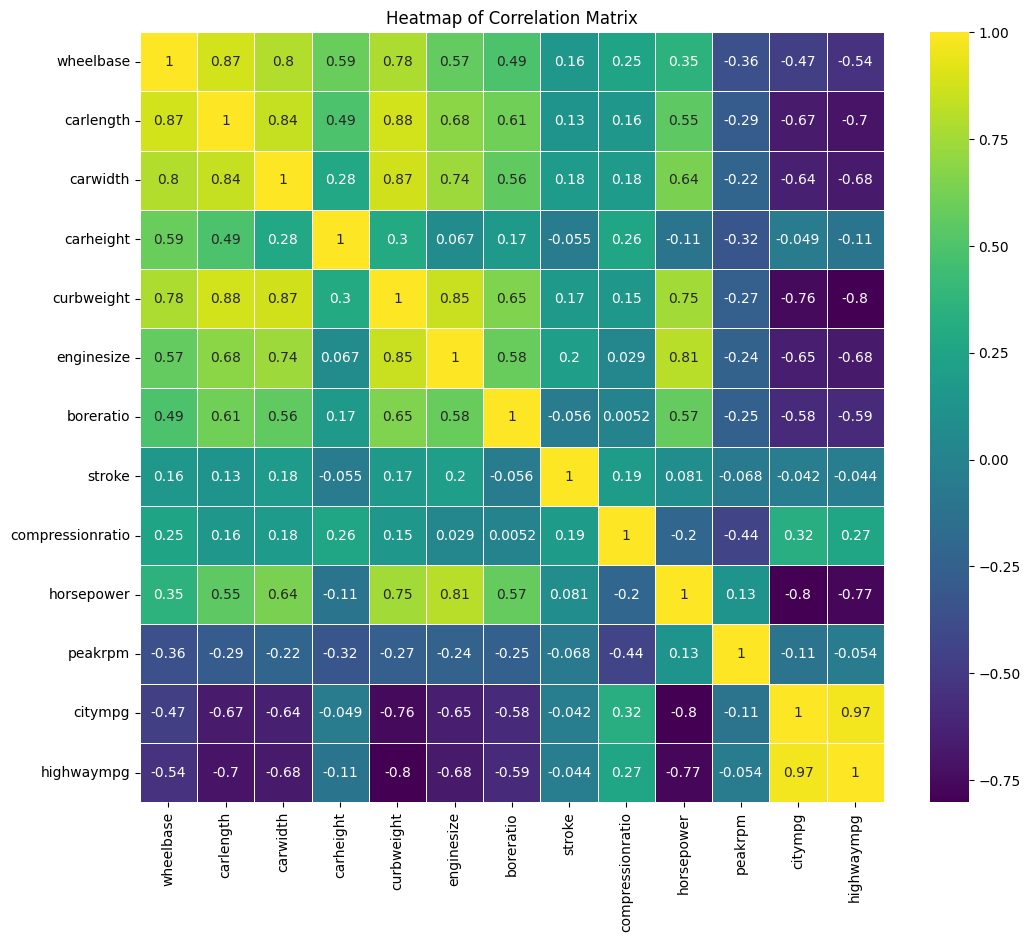

In [24]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# xem xét các cặp biến có hệ số tương quan cao (trên 0.75)
# giữ lại một trong các biến đó để đưa vào mô hình

In [25]:
# Chọn các biến độc lập cuối cùng dựa trên phân tích tương quan
final_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']

# Hiển thị các biến được chọn
print("Selected variables for the model:", final_vars)

Selected variables for the model: ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']


In [26]:
import pandas as pd

In [27]:
# Các biến phân loại cần mã hóa
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [30]:
# Mã hóa các biến phân loại thành các biến giả
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

In [31]:
data_encoded.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,False,False,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,False,False,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,False,False,False


In [33]:
import pandas as pd

# Giả sử dữ liệu đã được nạp vào biến 'data'

# Các biến phân loại cần mã hóa
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']

# Mã hóa các biến phân loại thành các biến giả
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

data_encoded.head()


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,False,False,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,False,False,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Xây dựng mô hình hồi quy tuyến tính
# So sánh SelectKBest và RFE

In [ ]:
# Sử dụng scikit-learn với các biến được chọn bởi SelectKBest

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Mã hóa các biến phân loại thành các biến giả
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Chọn các biến độc lập và biến phụ thuộc
X = data_encoded.drop(columns=['price', 'car_ID', 'CarName'])  # Xác định các biến độc lập
y = data_encoded['price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng SelectKBest để chọn các thuộc tính tốt nhất
kbest = SelectKBest(score_func=f_regression, k=10)  # Select top 10
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Xây dựng mô hình hồi quy tuyến tính
model_kbest = LinearRegression()
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

# Đánh giá mô hình
mse_kbest = mean_squared_error(y_test, y_pred_kbest)
r2_kbest = r2_score(y_test, y_pred_kbest)

print(f'SelectKBest - Mean Squared Error: {mse_kbest}')
print(f'SelectKBest - R-squared: {r2_kbest}')

SelectKBest - Mean Squared Error: 10532498.558980072
SelectKBest - R-squared: 0.8665826944001773


In [ ]:
# Sử dụng scikit-learn với các biến được chọn bởi RFE

In [48]:
from sklearn.feature_selection import RFE

In [49]:
# Sử dụng Recursive Feature Elimination (RFE) để chọn các thuộc tính tốt nhất
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)


mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f'RFE - Mean Squared Error: {mse_rfe}')
print(f'RFE - R-squared: {r2_rfe}')

RFE - Mean Squared Error: 28291363.55277327
RFE - R-squared: 0.6416275325537237


In [ ]:
# Sử dụng statsmodels để xây dựng mô hình hồi quy tuyến tính

In [53]:
import statsmodels.api as sm
import pandas as pd

In [56]:
selected_features_kbest = X_train.columns[kbest.get_support()]


In [57]:
# Thêm hằng số vào dữ liệu
X_train_kbest_sm = sm.add_constant(X_train[selected_features_kbest])
X_test_kbest_sm = sm.add_constant(X_test[selected_features_kbest])

In [59]:
# Xây dựng mô hình hồi quy tuyến tính bằng OLS
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [61]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7128546.783599315
R-squared: 0.9097012452093607


In [ ]:
# SelectKBest: Chọn ra các biến có mối tương quan cao nhất với biến phụ thuộc (price).
# RFE: Đánh giá từng biến và loại bỏ biến kém quan trọng nhất cho đến khi đạt được số lượng biến mong muốn.
# OLS với statsmodels: Cung cấp thêm thông tin chi tiết về mô hình, bao gồm các hệ số, p-value và các thống kê khác.